Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


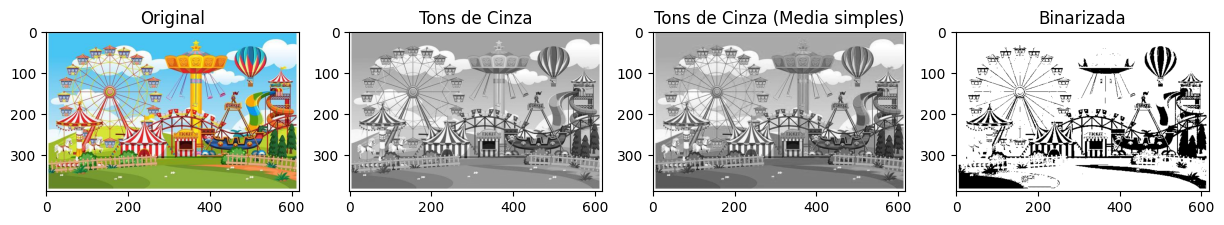

In [13]:
# Montar o Google Drive para usar as imagens e testar o algoritimo
from google.colab import drive
drive.mount('/content/drive')

# Importação de bibliotecas
import matplotlib.pyplot as plt
from PIL import Image

# Função para carregar a imagem
def carregar_imagem(caminho):
    imagem = Image.open(caminho)
    imagem = imagem.convert("RGB")
    return imagem

# Função para converter para tons de cinza
def converter_para_cinza(imagem):
    largura, altura = imagem.size
    # Image.new() é um método da biblioteca PIL que cria uma nova imagem.
    # "L" representa tons de cinza
    cinza = Image.new("L", (largura, altura))
    for x in range(largura):
        for y in range(altura):
            r, g, b = imagem.getpixel((x, y))
            # Poderia ser fieto uma média simples mas não leva em conta a sensibilidade do olho humano às diferentes cores.
            # O verde é muito mais visível do que o azul ou o vermelho, por isso recebe um peso maior.
            valor_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            cinza.putpixel((x, y), valor_cinza)
    return cinza

  # Função para converter para tons de cinza usando media simples (soma e divide por 3)
def converter_para_cinza_media_simples(imagem):
    largura, altura = imagem.size
    # Image.new() é um método da biblioteca PIL que cria uma nova imagem.
    # "L" representa tons de cinza
    cinza = Image.new("L", (largura, altura))
    for x in range(largura):
        for y in range(altura):
            r, g, b = imagem.getpixel((x, y))
            # Média simples.
            valor_cinza = int((r + g + b) / 3)
            cinza.putpixel((x, y), valor_cinza)
    return cinza

# Função para binarizar a imagem
def binarizar(imagem, limite=128):
    # Valor de corte que separa pixels claros de pixels escuros.
    # Pixels acima do limite são convertidos para 255 (branco).
    # Pixels abaixo ou iguais ao limite são convertidos para 0 (preto).
    largura, altura = imagem.size
    binaria = Image.new("L", (largura, altura))
    for x in range(largura):
        for y in range(altura):
            valor = imagem.getpixel((x, y))
            binaria.putpixel((x, y), 255 if valor > limite else 0)
    return binaria

# Caminho da imagem no Google Drive
caminho_imagem = '/content/drive/MyDrive/images/parque-de-diversões.jpg'

# Carregar e processar a imagem
imagem_original = carregar_imagem(caminho_imagem)
imagem_cinza = converter_para_cinza(imagem_original)
imagem_cinza_simples = converter_para_cinza_media_simples(imagem_original)
imagem_binaria = binarizar(imagem_cinza)

# Exibir as imagens
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(imagem_original)

plt.subplot(1, 4, 2)
plt.title("Tons de Cinza")
plt.imshow(imagem_cinza, cmap="gray")

plt.subplot(1, 4, 3)
plt.title("Tons de Cinza (Media simples)")
plt.imshow(imagem_cinza_simples, cmap="gray")

plt.subplot(1, 4, 4)
plt.title("Binarizada")
plt.imshow(imagem_binaria, cmap="gray")
plt.show()
